[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

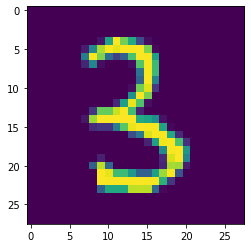

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%
Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
tensor(0.0737, grad_fn=<NllLossBackward>)
tensor(0.1792, grad_fn=<NllLossBackward>)
tensor(0.1000, grad_fn=<NllLossBackward>)
Accuracy : 0.978


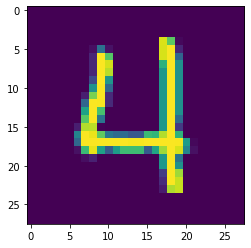

tensor(0)


In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle= True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle= True)
for data in trainset:
    print(data)
    break;
x,y = data[0][0],data[1][0]
print(y)
import matplotlib.pyplot as plt 
print(data[0][0].shape)
plt.imshow(data[0][0].view(28,28))
plt.show()
total = 0 
counter_dict = {}
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        # with multiclass softmax works
        return F.log_softmax(x, dim =1)      
        
net = Net()
print(net)
        
import torch
X = torch.rand((28*28))
X
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets

optimizer = optim.Adam(net.parameters(), lr= 0.001)

EPOCHS = 3

for epoch in range(3):
    for data in trainset:
        X,y = data 
        net.zero_grad()
        output =net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        
correct = 0
total = 0 

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy :" , round(correct/total, 3))
             
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

print(torch.argmax(net(X[3].view(-1,784))[0]))


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE =50
    CATS = "D:/Machine Learning/kagglecatsanddogs_3367a/PetImages/Cat"
    DOGS = "D:/Machine Learning/kagglecatsanddogs_3367a/PetImages/Dog"
    LABELS = {CATS:0 , DOGS: 1}
    
    training_data = []
    cat_count = 0
    dog_count = 0
    
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path =os.path.join(label,f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE,self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]] ])
                
                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass 
            
            
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats:",self.cat_count)
        print("Dogs:",self.dog_count)
                      
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()
         
            
training_data = np.load("training_data.npy",allow_pickle = True)
print(len(training_data))

print (training_data[1])

import matplotlib.pyplot as plt
plt.imshow(training_data[1][0],cmap = "gray")
plt.show()
